# Drill: Present the same data multiple ways

Dataset from [Kaggle](https://www.kaggle.com/kemical/kickstarter-projects/data)

In [1]:
from IPython.display import HTML

HTML('''
    <script>
        code_show=true; 
        function code_toggle() {
            if (code_show){
                $('div.input').hide();
                $('button#code-toggle').text('Show Code');
            } else {
                $('div.input').show();
                $('button#code-toggle').text('Hide Code');
            }
            code_show = !code_show
        }
    </script>

    <button id="code-toggle" onclick="javascript:code_toggle()">
        Hide Code
    </button>
''')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("ks-projects-201801.csv")
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


## Drills

### Plot one variable ('main_category') four different ways.

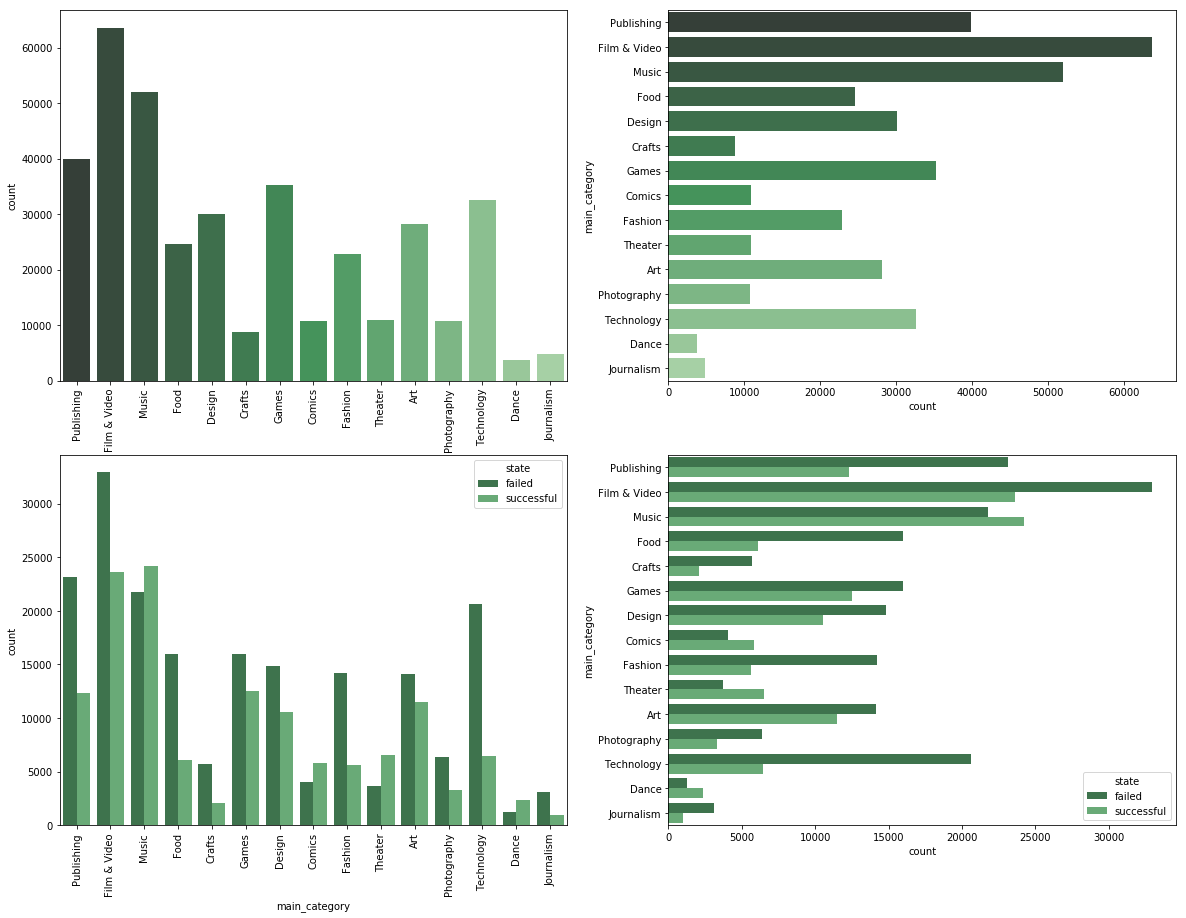

In [3]:
plt.figure(figsize=(20,15))

plt.subplot(2, 2, 1)
plt.xticks(rotation=90)
sns.countplot(x="main_category", data=df, palette="Greens_d")

plt.subplot(2, 2, 2)
sns.countplot(y="main_category", data=df, palette="Greens_d")

failed_vs_successful = df[df['state'] != 'undefined']
failed_vs_successful = failed_vs_successful[failed_vs_successful['state'] != 'canceled']
failed_vs_successful = failed_vs_successful[failed_vs_successful['state'] != 'live']
failed_vs_successful = failed_vs_successful[failed_vs_successful['state'] != 'suspended']

plt.subplot(2, 2, 3)
plt.xticks(rotation=90)
sns.countplot(x="main_category", hue="state", data=failed_vs_successful, palette="Greens_d")

plt.subplot(2, 2, 4)
sns.countplot(y="main_category", hue="state", data=failed_vs_successful, palette="Greens_d")

plt.show()

### Choose two continuous variables ('goal' and 'usd_goal_real'), and plot them three different ways.

AttributeError: 'FacetGrid' object has no attribute 'title'

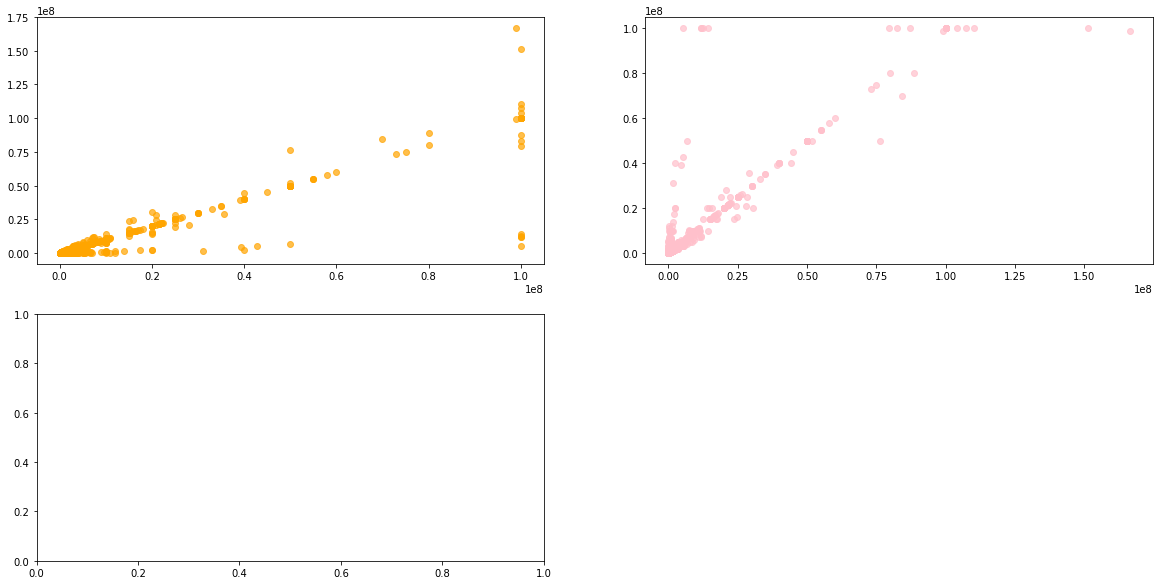

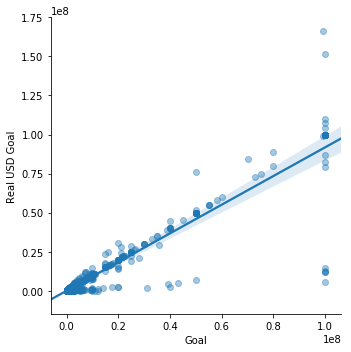

In [4]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
plt.scatter(x = df['goal'], y = df['usd_goal_real'], color = 'orange', alpha = 0.7)

plt.subplot(2, 2, 2)
plt.scatter(x = df['usd_goal_real'], y = df['goal'], color = 'pink', alpha = 0.7)

plt.subplot(2, 2, 3)
g = sns.lmplot(y = 'usd_goal_real', x = 'goal', data = df, fit_reg = True, scatter_kws = { 'alpha' : 0.4 })
g.set_ylabels("Real USD Goal")
g.set_xlabels("Goal")
g.title('Real USD Goals by Original Proposed Goals')

plt.show()

### Choose one continuous variable ('goal') and one categorical variable ('main_category') , and plot them six different ways.

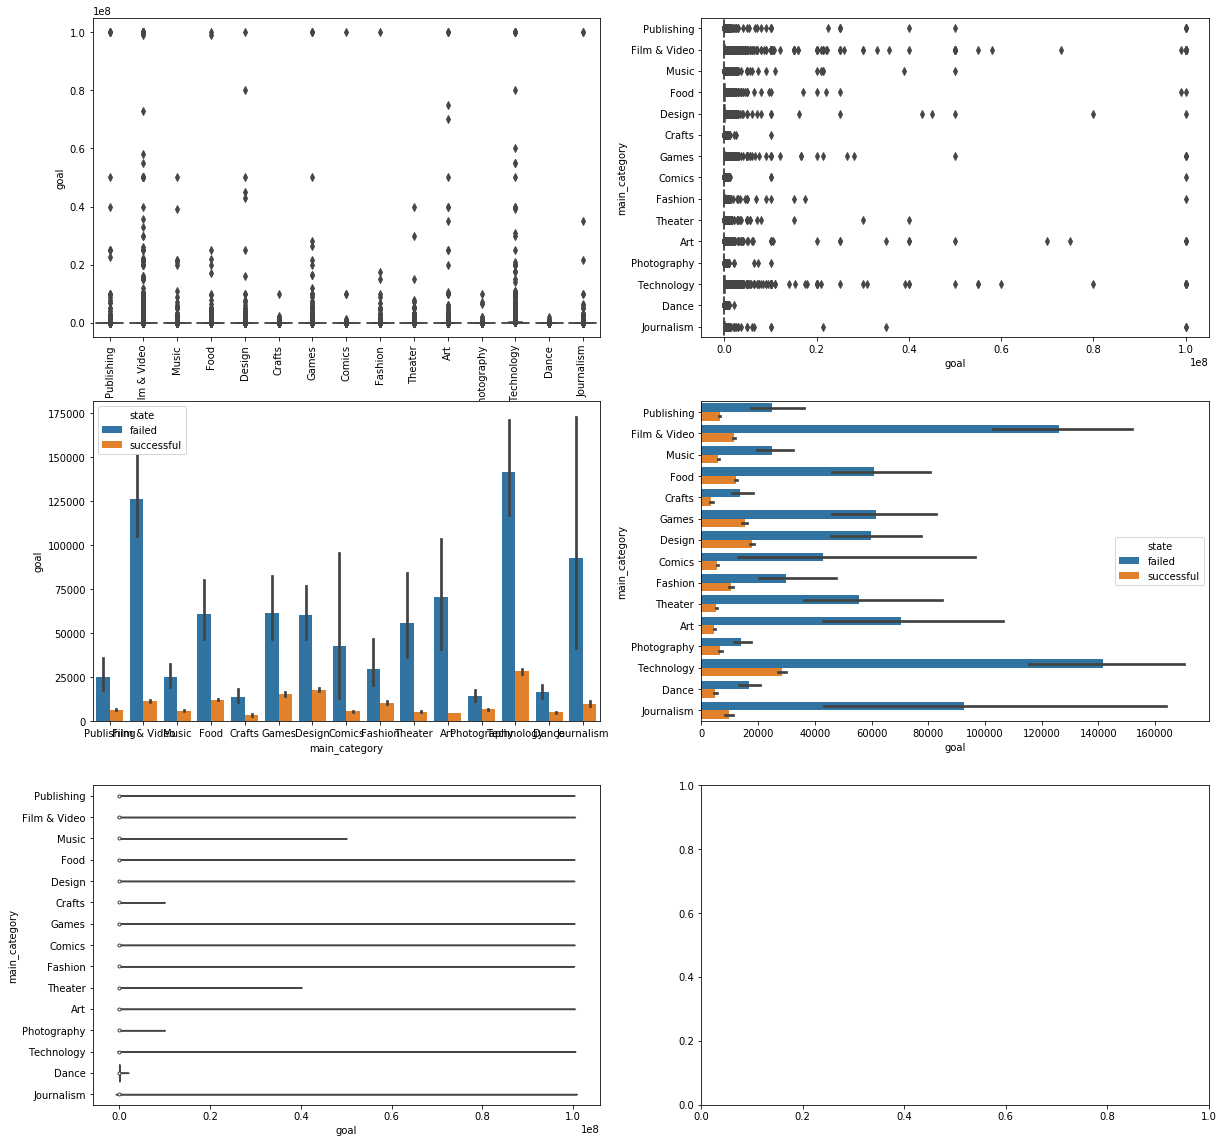

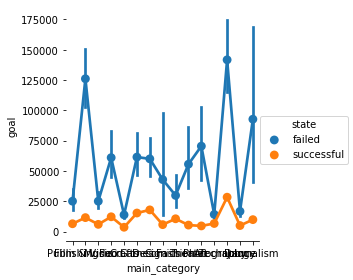

In [5]:
plt.figure(figsize=(20,20))

plt.subplot(3, 2, 1)
plt.xticks(rotation=90)
sns.boxplot(x="main_category", y="goal", data=df, dodge=False)

plt.subplot(3, 2, 2)
sns.boxplot(x="goal", y="main_category", data=df, orient='h', dodge=False)

plt.subplot(3, 2, 3)
sns.barplot(x="main_category", y="goal", hue="state", data=failed_vs_successful)

plt.subplot(3, 2, 4)
sns.barplot(x="goal", y="main_category", hue="state", data=failed_vs_successful)

plt.subplot(3, 2, 5)
sns.violinplot(x="goal", y="main_category", data=df)

plt.subplot(3, 2, 6)
g = sns.factorplot(x="main_category", y="goal", hue="state", data=failed_vs_successful)
g.despine(left=True)
# sns.swarmplot(x="main_category", y="goal", data=df)
# sns.stripplot(x="main_category", y="goal", data=df, jitter=True)

plt.show()

### Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

## Challenge
As an optional challenge, find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:

- Probability distributions
- Bivariate relationships
- Whether the distributions or the relationships vary across groups
- Accompany your plot with a written description of what you see.